### Importing Libraries for data exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

### Importing dataset

In [3]:
data = pd.read_csv('COVID19MEXICO2021.csv')

### Data exploration

In [4]:
data.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2022-08-09,z53cb3,2,12,9,2,9,9,2,1,...,1,2,97,1,2,7,99,México,97,97
1,2022-08-09,zze974,1,6,24,1,24,24,35,1,...,1,1,2,2,97,7,99,México,97,97
2,2022-08-09,zz7202,1,12,16,2,16,16,112,1,...,1,1,2,2,97,7,99,México,97,97
3,2022-08-09,z405fd,1,12,9,2,9,9,11,1,...,1,2,97,1,2,7,99,México,97,97
4,2022-08-09,z26b82,2,12,9,1,9,9,7,1,...,2,2,97,1,2,7,99,México,97,97


### Amount of rows and columns

In [17]:
print(data.shape)
print(f'The data set has {data.shape[0]} rows and {data.shape[1]} columns')

(1183124, 40)
The data set has 1183124 rows and 40 columns


### Checking for null values and duplication

In [18]:
# Checking for null vales
data.isnull().sum().sum()

0

> The data set does not have null values

In [19]:
# Checking for data duplication
data.duplicated().sum()

0

> No duplicates in the data set

### Basic Stats for data exploration

In [ ]:
data.describe(include='all').T

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1183124 entries, 0 to 1183123
Data columns (total 40 columns):
 #   Column                 Non-Null Count    Dtype 
---  ------                 --------------    ----- 
 0   FECHA_ACTUALIZACION    1183124 non-null  object
 1   ID_REGISTRO            1183124 non-null  object
 2   ORIGEN                 1183124 non-null  int64 
 3   SECTOR                 1183124 non-null  int64 
 4   ENTIDAD_UM             1183124 non-null  int64 
 5   SEXO                   1183124 non-null  int64 
 6   ENTIDAD_NAC            1183124 non-null  int64 
 7   ENTIDAD_RES            1183124 non-null  int64 
 8   MUNICIPIO_RES          1183124 non-null  int64 
 9   TIPO_PACIENTE          1183124 non-null  int64 
 10  FECHA_INGRESO          1183124 non-null  object
 11  FECHA_SINTOMAS         1183124 non-null  object
 12  FECHA_DEF              1183124 non-null  object
 13  INTUBADO               1183124 non-null  int64 
 14  NEUMONIA               1183124 non

### Cheking for the count of unique values for every column

In [22]:
for col in data.describe(include='all').columns:
    print(data[col].value_counts())
    print()

FECHA_ACTUALIZACION
2023-10-31    1183124
Name: count, dtype: int64

ID_REGISTRO
a9c809     1
g2d9e70    1
g39b773    1
g457ccd    1
g2b882f    1
          ..
g2cc0ee    1
g2b8797    1
g361801    1
g268d48    1
m1325ff    1
Name: count, Length: 1183124, dtype: int64

ORIGEN
2    821942
1    361182
Name: count, dtype: int64

SECTOR
4     633715
12    373296
9      87808
6      60739
3      17781
8       3126
5       3048
13      1350
7        720
11       528
10       449
2        357
99       182
1         25
Name: count, dtype: int64

ENTIDAD_UM
9     328920
15     85788
11     65359
19     64977
21     42433
22     37608
2      36811
24     35190
7      34563
20     30686
14     30348
30     27950
5      27799
28     27344
17     25163
13     24482
25     24301
26     22688
16     22451
3      20128
31     19051
12     17408
18     17332
1      17141
27     15837
8      14994
29     14297
32     13164
6      13035
23     11269
10      9461
4       5146
Name: count, dtype: int64

SEXO

## Understanding variables

<img src="./img/tables.1-EDIT.jpg" style="height: 500px;, align: center;"/>

<img src="./img/tables.2-EDIT.jpg" style="height: 500px;, align: center;"/>

> For more info about the data set check https://serendipia.digital/covid19-mx/guia-para-entender-los-datos-de-covid-19-de-la-secretaria-de-salud-de-mexico/ <br>
> https://datos.gob.mx/busca/dataset/informacion-referente-a-casos-covid-19-en-mexico

### Can we predict the of a patient death by COVID-19 based on a patient's comorbidities?
- We will use only patients with a **positive** COVID-19 result. 
- Nevertheless, the dataset has other variables not explained in the document. Ex. **RESULT** became 2 new variables **RESULTADO_LAB** and **RESULTADO_ANTIGENO**.
- We will use the rows where the patient has a positive result for COVID-19. This values were added in a new column named **'CLASIFICACION_FINAL'** where rows with values from **1 - 3** refer to the  patiens that were positive for COVID

### Columns will be drop due that not add information to the problem we are investigating

In [5]:
df = data.drop(columns=['FECHA_ACTUALIZACION', 'ID_REGISTRO', 'ORIGEN','SECTOR', 'ENTIDAD_UM',
                        'ENTIDAD_NAC', 'ENTIDAD_RES', 'MUNICIPIO_RES', 'TIPO_PACIENTE',
                        'FECHA_INGRESO', 'FECHA_SINTOMAS', 'OTRA_COM', 'OTRO_CASO',
                        'HABLA_LENGUA_INDIG', 'INDIGENA', 'NACIONALIDAD', 'MIGRANTE',
                        'TOMA_MUESTRA_LAB', 'RESULTADO_LAB','TOMA_MUESTRA_ANTIGENO',
                        'RESULTADO_ANTIGENO', 'PAIS_NACIONALIDAD', 'PAIS_ORIGEN', 'INTUBADO', 'UCI'])

In [6]:
df.head()

,SEXO,FECHA_DEF,NEUMONIA,EDAD,EMBARAZO,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,CLASIFICACION_FINAL
0,2,9999-99-99,2,26,97,2,2,2,2,2,2,2,2,2,7
1,1,9999-99-99,99,34,2,2,2,2,2,2,2,2,2,2,7
2,2,9999-99-99,2,41,97,2,2,2,2,2,2,2,2,1,7
3,2,9999-99-99,2,25,97,2,2,2,2,2,2,2,2,2,7
4,1,9999-99-99,2,20,2,2,2,2,2,2,2,2,2,2,7


### Selecting columns where the patient had positive result for COVID-19 

<img src="./img/columns_post_f.png" style="height: 500px;, align: center;"/>

In [7]:
df_covid_post = df[df.CLASIFICACION_FINAL < 4]

In [27]:
df_covid_post = df_covid_post.drop(columns=['tabaquismo', 'embarazo', 'asma'])

In [28]:
df_covid_post = df_covid_post.reset_index(drop=True)

In [30]:
df_covid_post.head()

,sexo,neumonia,edad,diabetes,epoc,inmusupr,hipertension,cardiovascular,obesidad,renal_cronica,decease
0,female,no,36,yes,no,no,no,no,no,no,0
1,female,no,63,no,no,no,no,yes,no,no,0
2,female,no,18,no,no,no,no,no,no,no,0
3,female,no,33,no,no,no,no,no,no,no,0
4,female,no,44,no,no,no,yes,no,yes,no,0


In [31]:
df_covid_post.shape

(2526578, 11)

In [32]:
df_covid_post.to_csv('covid_data_mex.csv', index=False)

### Data Cleaning

> We will change the value of numerical columns that refer to a category.<br>
> If the columns have values of 97, 98, 99, we will replace that value with NO.

In [11]:
df_covid_post['SEXO'] = df_covid_post.SEXO.apply(lambda x: 'female' if x == 1 else 'male')

In [12]:
cols = ['NEUMONIA', 'EMBARAZO',
       'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO']

In [13]:
for col in cols:
    df_covid_post[col] = df_covid_post[col].apply(lambda x: 'yes' if x == 1 else 'no')

In [14]:
df_covid_post.head()

,SEXO,FECHA_DEF,NEUMONIA,EDAD,EMBARAZO,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,CLASIFICACION_FINAL
0,female,9999-99-99,no,36,no,yes,no,no,no,no,no,no,no,no,3
1,female,9999-99-99,no,63,no,no,no,yes,no,no,yes,no,no,no,3
2,female,9999-99-99,no,18,yes,no,no,no,no,no,no,no,no,no,1
3,female,9999-99-99,no,33,no,no,no,no,no,no,no,no,no,no,3
4,female,9999-99-99,no,44,no,no,no,no,no,yes,no,yes,no,no,3


## Feature Engineering

### Making a new column name 'decease' to record the patientes that died.

In [15]:
df_covid_post['decease'] = df_covid_post.FECHA_DEF.apply(lambda x: 0 if x == '9999-99-99' else 1)

In [16]:
df_covid_post.drop(columns=['FECHA_DEF', 'CLASIFICACION_FINAL'], inplace=True)

In [17]:
df_covid_post.head()

,SEXO,NEUMONIA,EDAD,EMBARAZO,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,decease
0,female,no,36,no,yes,no,no,no,no,no,no,no,no,0
1,female,no,63,no,no,no,yes,no,no,yes,no,no,no,0
2,female,no,18,yes,no,no,no,no,no,no,no,no,no,0
3,female,no,33,no,no,no,no,no,no,no,no,no,no,0
4,female,no,44,no,no,no,no,no,yes,no,yes,no,no,0


In [18]:
df_covid_post.columns = df_covid_post.columns.str.lower()

In [19]:
df_covid_post.head(3)

,sexo,neumonia,edad,embarazo,diabetes,epoc,asma,inmusupr,hipertension,cardiovascular,obesidad,renal_cronica,tabaquismo,decease
0,female,no,36,no,yes,no,no,no,no,no,no,no,no,0
1,female,no,63,no,no,no,yes,no,no,yes,no,no,no,0
2,female,no,18,yes,no,no,no,no,no,no,no,no,no,0


## EDA

In [22]:
# Making list with teh categorical variables
cat_cols = ['sexo','neumonia','embarazo', 'diabetes', 'epoc',
       'asma', 'inmusupr', 'hipertension', 'cardiovascular', 'obesidad',
       'renal_cronica', 'tabaquismo']

### Univariate stats

### Numerical variables

In [23]:
df_covid_post.decease.value_counts()

decease
0    2385150
1     141499
Name: count, dtype: int64

In [24]:
# Set numerical variables to a format to only 6 values after the decimal point
pd.set_option('display.float_format', '{:.6f}'.format)

In [25]:
df_covid_post.edad.describe()

count   2526649.000000
mean         39.167037
std          17.276972
min           0.000000
25%          26.000000
50%          37.000000
75%          50.000000
max         147.000000
Name: edad, dtype: float64

> *... El rango de edad fue de 0 a 113 años...* <br>
> The age range was from 0 to 113. Meaning that any row when the age is greater than 113 will be dropped

In [26]:
df_covid_post = df_covid_post.drop(df_covid_post[df_covid_post.edad > 113].index)

In [42]:
df_covid_post.edad.describe()

count   427372.000000
mean        41.751652
std         17.548158
min          0.000000
25%         29.000000
50%         40.000000
75%         53.000000
max        113.000000
Name: edad, dtype: float64

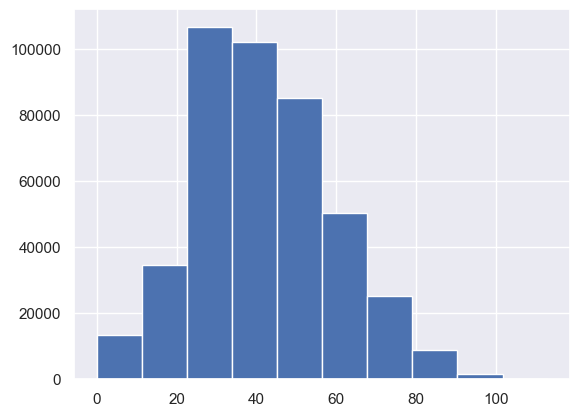

In [43]:
df_covid_post.edad.hist();

### Categorical variables

In [44]:
df_covid_post.describe(exclude='number')

,sexo,neumonia,embarazo,diabetes,epoc,asma,inmusupr,hipertension,cardiovascular,obesidad,renal_cronica,tabaquismo
count,427372,427372,427372,427372,427372,427372,427372,427372,427372,427372,427372,427372
unique,2,2,2,2,2,2,2,2,2,2,2,2
top,female,no,no,no,no,no,no,no,no,no,no,no
freq,257522,417825,421826,390075,424082,417493,424197,371923,422430,385229,423954,408629


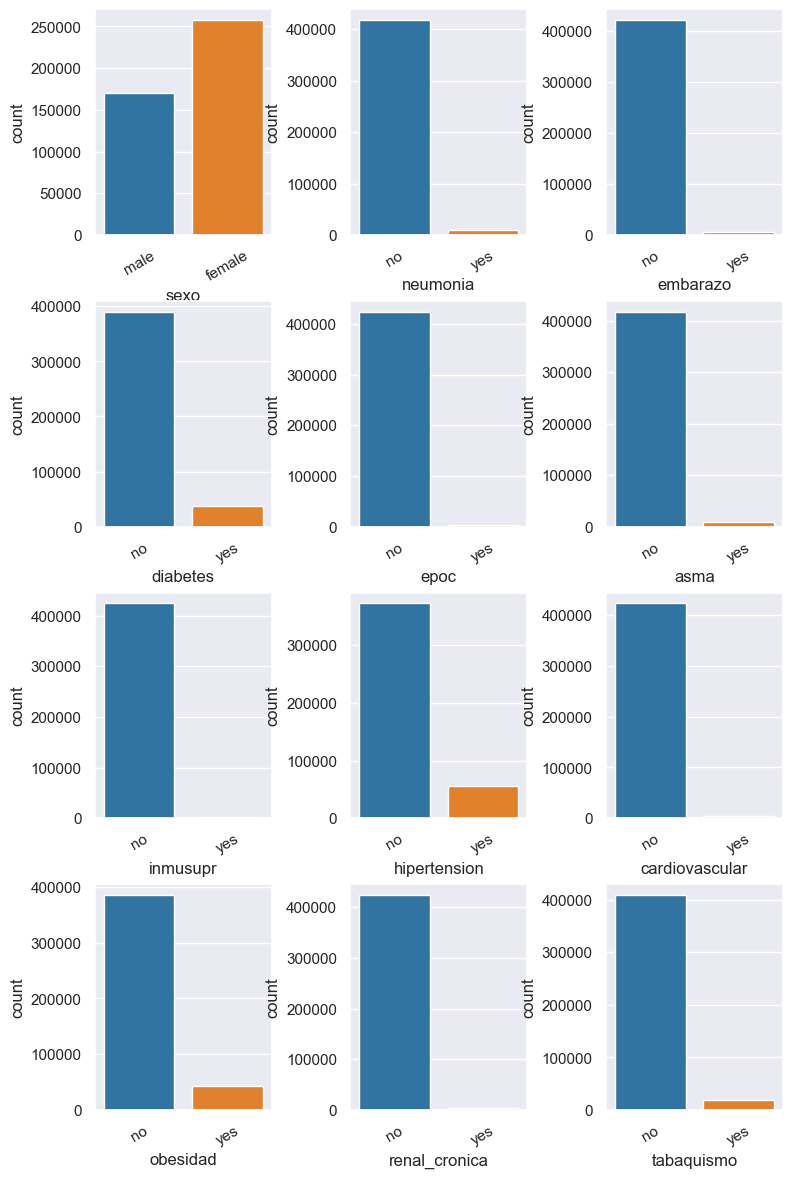

In [45]:
fig, ax = plt.subplots(nrows = 4, ncols = 3, figsize =(8,12))
fig.tight_layout(pad=2.0)
i = 0
for row in range(4):
    for col in range(3):
        g = sns.countplot(x=cat_cols[i], data=df_covid_post, ax = ax[row,col], palette="tab10");
        g.set_xticklabels(g.get_xticklabels(), rotation=30)
        i += 1
plt.show()

### Bivariate Charts

#### Age vs decease

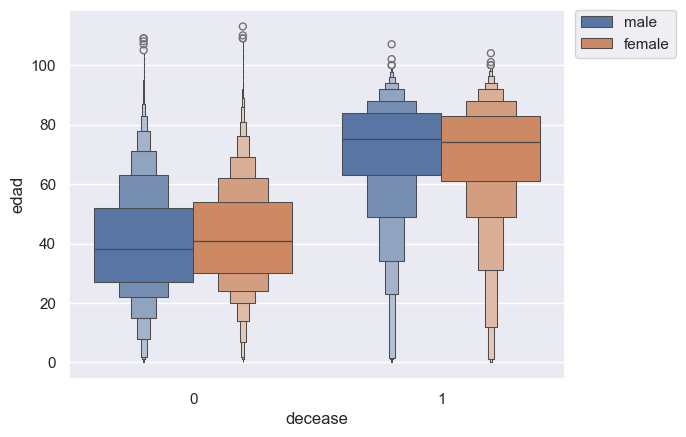

In [46]:
sns.boxenplot(data=df_covid_post, x='decease', y='edad', hue='sexo');
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

### Categorical variables vs decease

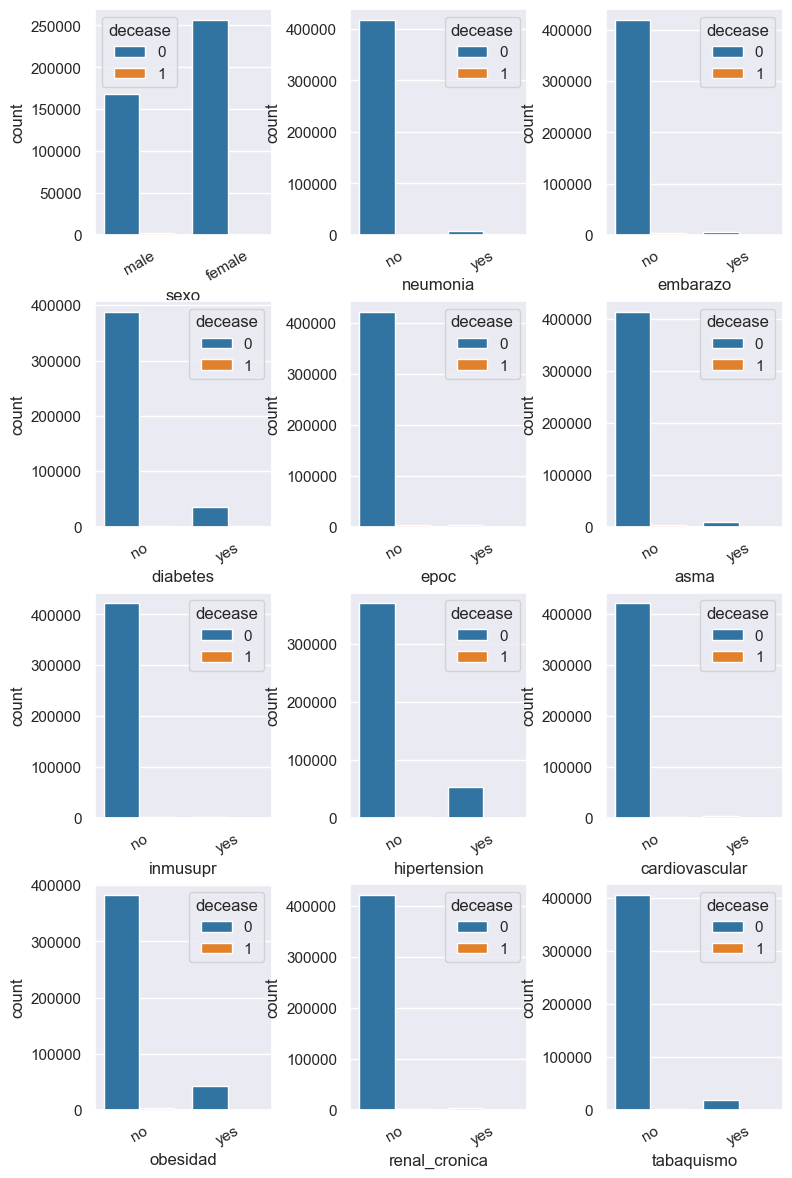

In [47]:
fig, ax = plt.subplots(nrows = 4, ncols = 3, figsize =(8,12))
fig.tight_layout(pad=2.0)
i = 0
for row in range(4):
    for col in range(3):
        g = sns.countplot(x=cat_cols[i], data=df_covid_post, ax = ax[row,col], palette="tab10", hue='decease');
        g.set_xticklabels(g.get_xticklabels(), rotation=30)
        i += 1
plt.show()

### Decease risk ratio by group

In [48]:
global_decease = df_covid_post.decease.mean()
global_decease

0.006928390254859935

In [49]:
from IPython.display import display

In [50]:
for c in cat_cols:
    print(c)
    df_group = df_covid_post.groupby(c).decease.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_decease
    df_group['risk'] = df_group['mean'] / global_decease
    display(df_group)
    print()
    print()

sexo


,mean,count,diff,risk
sexo,,,,
female,0.004404,257522,-0.002525,0.635574
male,0.010757,169850,0.003828,1.552532




neumonia


,mean,count,diff,risk
neumonia,,,,
no,0.001261,417825,-0.005667,0.182047
yes,0.254949,9547,0.248021,36.797754




embarazo


,mean,count,diff,risk
embarazo,,,,
no,0.007017,421826,0.000089,1.012805
yes,0.000180,5546,-0.006748,0.026025




diabetes


,mean,count,diff,risk
diabetes,,,,
no,0.004848,390075,-0.002081,0.699699
yes,0.028689,37297,0.021760,4.140736




epoc


,mean,count,diff,risk
epoc,,,,
no,0.006301,424082,-0.000628,0.909399
yes,0.087842,3290,0.080914,12.678550




asma


,mean,count,diff,risk
asma,,,,
no,0.006965,417493,0.000037,1.005340
yes,0.005365,9879,-0.001563,0.774338




inmusupr


,mean,count,diff,risk
inmusupr,,,,
no,0.006516,424197,-0.000413,0.940455
yes,0.062047,3175,0.055119,8.955507




hipertension


,mean,count,diff,risk
hipertension,,,,
no,0.004469,371923,-0.002460,0.644979
yes,0.023427,55449,0.016499,3.381295




cardiovascular


,mean,count,diff,risk
cardiovascular,,,,
no,0.006240,422430,-0.000688,0.900655
yes,0.065763,4942,0.058834,9.491793




obesidad


,mean,count,diff,risk
obesidad,,,,
no,0.006926,385229,-0.000003,0.999619
yes,0.006953,42143,0.000024,1.003483




renal_cronica


,mean,count,diff,risk
renal_cronica,,,,
no,0.006187,423954,-0.000741,0.892991
yes,0.098888,3418,0.091960,14.272903




tabaquismo


,mean,count,diff,risk
tabaquismo,,,,
no,0.006593,408629,-0.000336,0.951560
yes,0.014245,18743,0.007317,2.056079


### Feature importance: Mutual information

In [51]:
from sklearn.metrics import mutual_info_score

In [52]:
# Function to get mutal information for all columns
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_covid_post.decease)

In [53]:
mi = df_covid_post[cat_cols].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

neumonia         0.019207
hipertension     0.002018
diabetes         0.002000
renal_cronica    0.001443
epoc             0.001150
cardiovascular   0.001087
sexo             0.000683
inmusupr         0.000625
tabaquismo       0.000139
embarazo         0.000080
asma             0.000005
obesidad         0.000000
dtype: float64

### Hypothesis tesiting for categorical variables, Chi square

In [54]:
from scipy.stats import chi2_contingency

In [55]:
# Function to run the test in all categorical variables
def chi2_analisys(df, dep_var, columns):
    """
    Arguments are a dataframe and the name of the Dependent variable as a string
    :param dataframe:
    :param dep_var:
    :return:
    """
    data_to_add = []
    for col in columns:
        temp_crosstab = pd.crosstab(df[dep_var], df[col])
        temp_result = chi2_contingency(temp_crosstab)
        if col != dep_var:
            if temp_result[1] < 0.05:
                # print(f'Dependent Var: {dep_var} ---- Independent Var: {col} ----- p-value={round(temp_result[1], 10)} -> We will reject the NULL hypothesis.')
                data_to_add.append([dep_var, col, round(temp_result[1], 10), 'Reject'])
            else:
                # print(f'Dependent Var: {dep_var} ---- Independent Var: {col} ----- p-value={round(temp_result[1], 10)} -> We will not reject the NULL hypothesis.')
                data_to_add.append([dep_var, col, round(temp_result[1], 10), 'Accept'])
    new_df = pd.DataFrame(data_to_add, columns=['Dependent', 'Independent', 'p-value', 'NULL Hypothesis'])
    return new_df.sort_values(by='NULL Hypothesis').reset_index(drop=True)

In [56]:
result = chi2_analisys(df_covid_post, 'decease', cat_cols)
result

,Dependent,Independent,p-value,NULL Hypothesis
0,decease,asma,0.066636,Accept
1,decease,obesidad,0.974496,Accept
2,decease,sexo,0.000000,Reject
3,decease,neumonia,0.000000,Reject
4,decease,embarazo,0.000000,Reject
5,decease,diabetes,0.000000,Reject
6,decease,epoc,0.000000,Reject
7,decease,inmusupr,0.000000,Reject
8,decease,hipertension,0.000000,Reject
9,decease,cardiovascular,0.000000,Reject


### Prepare dataset for modeling

In [57]:
# Using OrdinalEncoder to encode binary categorical data
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [58]:
# Making the encoder
encoder = OrdinalEncoder()

In [59]:
df_covid_post[cat_cols] = encoder.fit_transform(df_covid_post[cat_cols])

In [60]:
scaler = MinMaxScaler()

In [61]:
df_covid_post.edad = scaler.fit_transform(df_covid_post[['edad']])
df_covid_post.head()

,sexo,neumonia,edad,embarazo,diabetes,epoc,asma,inmusupr,hipertension,cardiovascular,obesidad,renal_cronica,tabaquismo,decease
0,1.000000,0.000000,0.362832,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,0.000000,0.000000,0.575221,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2,0.000000,0.000000,0.548673,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
3,1.000000,0.000000,0.353982,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,0.000000,0.000000,0.327434,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0


### Dividing the data set in X and y to check for multicoliniarity

In [62]:
X = df_covid_post.iloc[:, :-1]
y = df_covid_post.iloc[:, -1]

### Checking for multicoliniarity

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [64]:
# Making a DataFrame to save the values
vif_df = pd.DataFrame()

vif_df['features'] = X.columns

In [65]:
vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

vif_df

,features,VIF
0,sexo,1.501201
1,neumonia,1.071358
2,edad,2.004896
3,embarazo,1.009032
4,diabetes,1.330130
5,epoc,1.045293
6,asma,1.023996
7,inmusupr,1.023706
8,hipertension,1.484628
9,cardiovascular,1.057481


> No multicoliniarity in the datasete

### Data prep for modeling

In [66]:
X_full_train, X_test, y_full_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
X_train, X_val, y_train, y_val = train_test_split(X_full_train, y_full_train, test_size=0.25, random_state=123)

In [67]:
X_train.shape, y_train.shape

((256422, 13), (256422,))

In [68]:
X_val.shape, y_val.shape

((85475, 13), (85475,))

In [69]:
X_test.shape, y_test.shape

((85475, 13), (85475,))

## Libraries for all the model

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [71]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, recall_score

### Logistic Regression

In [72]:
reg = LogisticRegression(solver='lbfgs', max_iter=10000, random_state=123)

In [73]:
reg.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=123)

In [74]:
accuracy_score(y_val, reg.predict(X_val))

0.993109096226967

In [75]:
roc_auc_score(y_val, reg.predict_proba(X_val)[:,1])

0.9755321870105902

In [76]:
reg_conf_matrix = confusion_matrix(y_val, reg.predict(X_val))
reg_conf_matrix

array([[84798,    95],
       [  494,    88]])

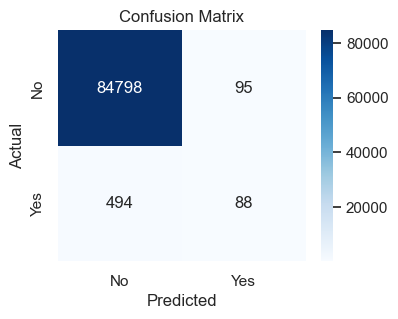

In [79]:
# Define class labels for binary classification
class_labels = ['No', 'Yes']

# Create a heatmap of the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(reg_conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Decision Tree Classifier

In [80]:
# Create the parameter for tunning the Tree Classifier
params = {
    'max_depth': [1, 2, 3, 5, 10, 15, 20, None],
    'min_samples_leaf': [1, 5, 10, 20, 50, 100, 200, 500],
    'criterion': ["gini", "entropy"]
}

In [81]:
dt = DecisionTreeClassifier(random_state=123)

In [82]:
grid_search = GridSearchCV(estimator=dt, param_grid=params, cv=5, n_jobs=-1, verbose=1, scoring = "f1")

In [83]:
%%time
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
CPU times: user 1.62 s, sys: 1.27 s, total: 2.89 s
Wall time: 26.9 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 5, 10, 15, 20, None],
                         'min_samples_leaf': [1, 5, 10, 20, 50, 100, 200, 500]},
             scoring='f1', verbose=1)

#### Best parameters

In [84]:
grid_search.best_estimator_

DecisionTreeClassifier(random_state=123)

#### Final Tree

In [91]:
dt = DecisionTreeClassifier(random_state=123)

In [92]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=123)

In [93]:
accuracy_score(y_val, dt.predict(X_val))

0.9919274641708101

In [94]:
roc_auc_score(y_val, dt.predict_proba(X_val)[:,1])

0.7474523822448335

In [95]:
dt_conf_matrix = confusion_matrix(y_val, dt.predict(X_val))

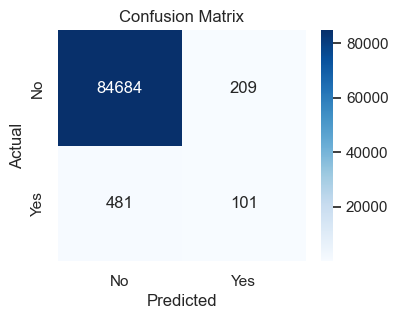

In [97]:
# Define class labels for binary classification
class_labels = ['No', 'Yes']

# Create a heatmap of the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(dt_conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Create and fit the ComplementNB model

In [98]:
cnb = ComplementNB()

cnb.fit(X_train, y_train)

ComplementNB()

In [99]:
# Evaluate the model
accuracy = cnb.score(X_val, y_val)
print("Accuracy:", accuracy)

Accuracy: 0.9209242468558058


In [100]:
roc_auc_score(y_val, cnb.predict_proba(X_val)[:, 1])

0.9156108904910945

In [101]:
recall_score(y_val, cnb.predict(X_val))

0.8900343642611683

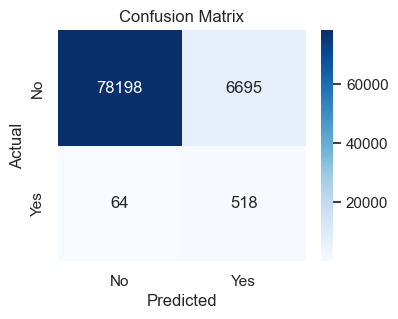

In [102]:
cnb_conf_matrix = confusion_matrix(y_val, cnb.predict(X_val))

# Define class labels for binary classification
class_labels = ['No', 'Yes']

# Create a heatmap of the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(cnb_conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [103]:
tn, fp, fn, tp  = confusion_matrix(y_val, cnb.predict(X_val)).ravel()

In [104]:
tn, fp, fn, tp 

(78198, 6695, 64, 518)

### Random Forest Classifier

#### Finding the best number of estimators for the Random Forest

In [105]:
scores = []

for n in range(10, 101, 5):
    rfc = RandomForestClassifier(n_estimators=n, random_state=123)
    rfc.fit(X_train, y_train)

    y_pred = rfc.predict(X_val)
    auc = roc_auc_score(y_val, y_pred)
    
    scores.append((n, auc))

In [106]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])

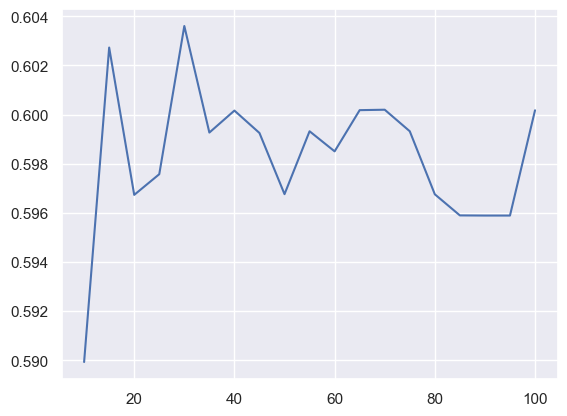

In [107]:
plt.plot(df_scores.n_estimators, df_scores.auc);

### Finding the optimal max_depth for the Random Forest

In [108]:
scores_m = []

for d in [5, 10, 15]:
    for n in range(20, 70, 2):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores_m.append((d, n, auc))

In [109]:
columns = ['max_depth', 'n_estimators', 'auc']
df_scores_new = pd.DataFrame(scores_m, columns=columns)

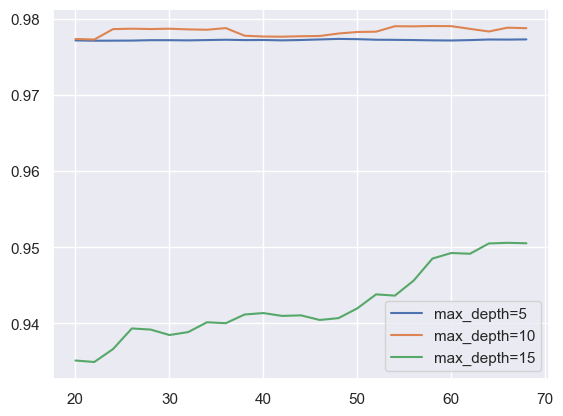

In [110]:
for d in [5, 10, 15]:
    df_subset = df_scores_new[df_scores_new.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='max_depth=%d' % d)

plt.legend()
plt.show()

In [111]:
df_scores_new.sort_values('auc', ascending=False).head()

,max_depth,n_estimators,auc
44,10,58,0.979058
45,10,60,0.979040
42,10,54,0.979030
43,10,56,0.979013
48,10,66,0.978839


### Finding the optimal min_sample_leaf for the Random Forest

In [112]:
scores_min_s = []

for s in [1, 3, 5, 10, 50]:
    for n in range(20, 70, 2):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=10,
                                    min_samples_leaf=s,
                                    random_state=1, n_jobs=-1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores_min_s.append((s, n, auc))

In [113]:
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores_min = pd.DataFrame(scores_min_s, columns=columns)

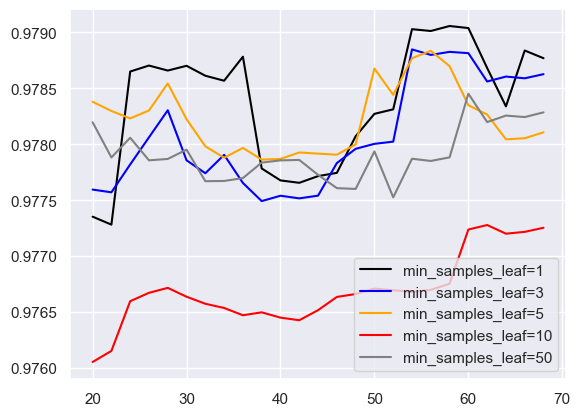

In [114]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
values = [1, 3, 5, 10, 50]

for s, col in zip(values, colors):
    df_subset = df_scores_min[df_scores_min.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.legend()
plt.show()

In [115]:
df_scores_min.sort_values('auc', ascending=False).head()

,min_samples_leaf,n_estimators,auc
19,1,58,0.979058
20,1,60,0.979040
17,1,54,0.979030
18,1,56,0.979013
42,3,54,0.978849


In [116]:
params_rf = {
    'n_estimators': [20,30,40,50,60,70],
    'min_samples_leaf': [1,5,10,50],
    'max_depth': [5,10,15]
}

In [117]:
rfc_cv = RandomForestClassifier(random_state=123)

In [118]:
grid_search_rf = GridSearchCV(estimator=rfc_cv, param_grid=params_rf, cv=5, n_jobs=-1, verbose=1, scoring = "roc_auc")

In [119]:
grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 5, 10, 50],
                         'n_estimators': [20, 30, 40, 50, 60, 70]},
             scoring='roc_auc', verbose=1)

In [120]:
print(grid_search_rf.best_estimator_)
print(grid_search_rf.best_score_)

RandomForestClassifier(max_depth=15, min_samples_leaf=50, n_estimators=60,
                       random_state=123)
0.9761168249076931


### Building final Random Forest Model

In [121]:
rfc_final = RandomForestClassifier(n_estimators=60, 
                                   max_depth=15, 
                                   min_samples_leaf=50, 
                                   random_state=123, n_jobs=-1)

In [122]:
rfc_final.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, min_samples_leaf=50, n_estimators=60,
                       n_jobs=-1, random_state=123)

In [123]:
y_pred = rfc_final.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)

In [124]:
auc

0.9778281032403718

In [125]:
rfc_final.score(X_val, y_val)

0.9931909915179877

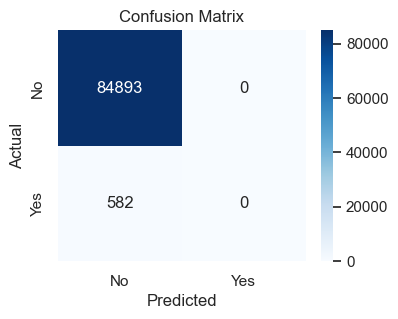

In [126]:
rfc_conf_matrix = confusion_matrix(y_val, rfc_final.predict(X_val))

# Define class labels for binary classification
class_labels = ['No', 'Yes']

# Create a heatmap of the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(rfc_conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [127]:
feature_names = X_val.columns 

In [128]:
feature_importances = rfc_final.feature_importances_

In [129]:
feature_importance_df = pd.DataFrame(
    {'Feature': feature_names, 'Importance': feature_importances}
)

In [130]:
feature_importance_df.sort_values('Importance', ascending=False)

,Feature,Importance
1,neumonia,0.743738
2,edad,0.160169
11,renal_cronica,0.022950
0,sexo,0.021119
8,hipertension,0.014233
4,diabetes,0.012516
5,epoc,0.008258
9,cardiovascular,0.006559
7,inmusupr,0.004268
12,tabaquismo,0.004245


### XGBOOST Classifier  (last model)

In [131]:
xgb_model = xgb.XGBClassifier()

#### Making a GridSearch to tune and get the best model

In [132]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 6, None],
    'learning_rate': [0.1, 0.3],
    'subsample': [0.8],
    'seed': [1],
    'objective': ['binary:logistic', 'binary:logitraw'],
    'nthread': [8],
}

In [133]:
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=4, scoring='f1')

In [134]:
# Perform the grid search to find the best model
grid_search_xgb.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.3], 'max_depth': [5, 6, None],
                         'n_estimators': [50, 100], 'nthread': [8],
                         'objective': ['binary:logistic', 'binary:logitraw'],
                         'seed': [1], 'subsample': [0.8]},
             scoring='f1')

In [135]:
best_params = grid_search_xgb.best_params_
best_params

{'learning_rate': 0.3,
 'max_depth': 6,
 'n_estimators': 100,
 'nthread': 8,
 'objective': 'binary:logistic',
 'seed': 1,
 'subsample': 0.8}

In [136]:
# Get the best hyperparameters and model
best_model = grid_search_xgb.best_estimator_

In [137]:
# Make predictions on the test set using the best model
y_pred_xgb = best_model.predict_proba(X_val)[:,1]

In [138]:
auc = roc_auc_score(y_val, y_pred_xgb)
auc

0.9739209309086599

In [139]:
best_model.score(X_val, y_val)

0.9926879204445744

In [140]:
confusion_matrix(y_val, best_model.predict(X_val))

array([[84773,   120],
       [  505,    77]])

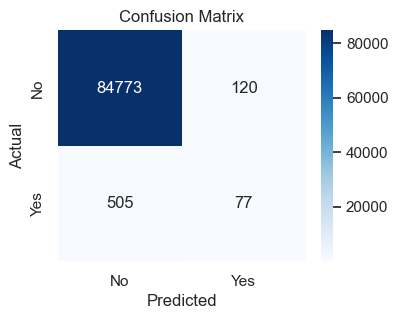

In [141]:
xgb_conf_matrix = confusion_matrix(y_val, best_model.predict(X_val))

# Define class labels for binary classification
class_labels = ['No', 'Yes']

# Create a heatmap of the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(xgb_conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [142]:
tn, fp, fn, tp = confusion_matrix(y_val, best_model.predict(X_val)).ravel()

In [143]:
tn, fp, fn, tp

(84773, 120, 505, 77)

In [144]:
from sklearn.metrics import precision_score

In [145]:
precision_score(y_val, best_model.predict(X_val))

0.39086294416243655